The beta-geometric (BG) distribution is a robust simple model for characterizing and forecasting the length of a customer's relationship with a firm in a contractual setting.

**Source**:
- [A Spreadsheet-Literate Non-Statistician's Guide to the Beta-Geometric Model](http://www.brucehardie.com/notes/032/)
- [Customer-Base Valuation in a Contractual Setting: The Perils of Ignoring Heterogeneity](https://brucehardie.com/papers/022/)
- [How to Project Customer Retention](http://www.brucehardie.com/papers/021/)
- [How Not to Project Customer Retention](https://brucehardie.com/notes/016/)

In [32]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import beta

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import display_markdown

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [33]:
year, alive = np.loadtxt('data/hardie-sample-retention.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
year = year.astype(int)
alive = alive.astype(float)

train_period = 4
train_year = year[:train_period+1]
train_alive = alive[:train_period+1]

In [34]:
def bg_param(year, alive):
    actual_retention = alive[1:] / alive[:-1]
    def SSE(x):
        gamma, delta = x[0], x[1]
        est_retention = (delta+year[1:]-1)/(gamma+delta+year[1:]-1)
        return np.sum((actual_retention - est_retention)**2)
    return minimize(SSE, x0=[0.1,0.1], bounds=[(0, np.inf), (0, np.inf)])

res = bg_param(train_year, train_alive)
gamma, delta = res.x
SSE = res.fun

display_markdown(f'''$\\gamma$ = {gamma:0.4f}

$\\delta$ = {delta:0.4f}

Sum of Squared Errors = {SSE:0.4E}''', raw=True)

$\gamma$ = 0.7597

$\delta$ = 1.2862

Sum of Squared Errors = 1.1645E-04

In [54]:
act_retention_rate = alive[1:] / alive[:-1]

est_retention_rate = (delta+year[1:]-1)/(gamma+delta+year[1:]-1)
est_survivor_function = np.ones(year.shape)
est_survivor_function[1:] = est_retention_rate
est_survivor_function = np.cumprod(est_survivor_function)
est_survivros = est_survivor_function * alive[0]

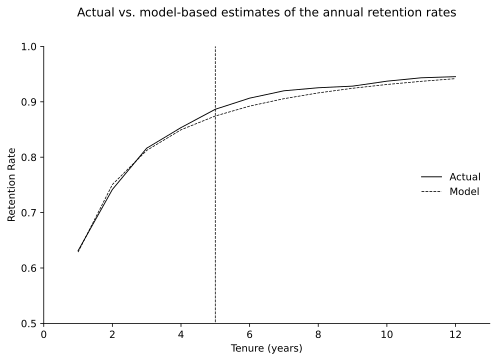

In [72]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(year[1:], act_retention_rate, "k-", linewidth=0.9, label='Actual')
plt.plot(year[1:], est_retention_rate, "k--", linewidth=0.75, label='Model')
plt.plot([5 for _ in np.arange(0,1.1,0.5)], [_ for _ in np.arange(0,1.1,0.5)], "k--", linewidth=0.75)
plt.xlabel("Tenure (years)")
plt.ylabel("Retention Rate")
plt.title('Actual vs. model-based estimates of the annual retention rates', pad=30)
plt.ylim(0.5,1)
plt.xlim(0, 13)
plt.legend(loc=7, frameon=False);

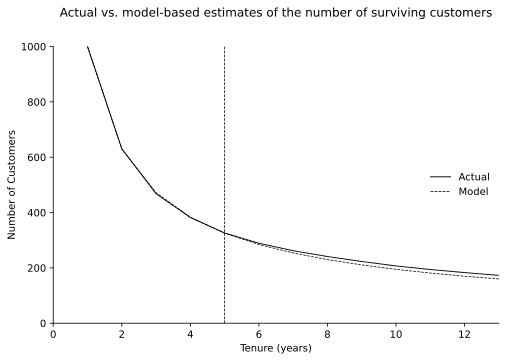

In [73]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(year+1, alive, "k-", linewidth=0.9, label='Actual')
plt.plot(year+1, est_survivros, "k--", linewidth=0.75, label='Model')
plt.plot([5 for _ in np.arange(0,1100,500)], [_ for _ in np.arange(0,1100,500)], "k--", linewidth=0.75)
plt.xlabel("Tenure (years)")
plt.ylabel("Number of Customers")
plt.title('Actual vs. model-based estimates of the number of surviving customers', pad=30)
plt.ylim(0,1000)
plt.xlim(0, 13)
plt.legend(loc=7, frameon=False);

In [90]:
np.around(np.diff(beta.cdf(np.arange(0,1.02,0.02), gamma, delta)) * alive[0])

array([63., 43., 38., 35., 32., 31., 29., 28., 27., 26., 25., 25., 24.,
       23., 23., 22., 22., 21., 21., 20., 20., 20., 19., 19., 18., 18.,
       18., 17., 17., 16., 16., 16., 15., 15., 15., 14., 14., 13., 13.,
       13., 12., 12., 11., 11., 10., 10.,  9.,  8.,  7.,  5.])